In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
plt.ion()
import os
import glob
import matplotlib.colors as colors
import numpy as np
import shapefile
import gdal
import shutil

In [3]:
sf = shapefile.Reader('gadm28.shp')

20100131
20100403
20100405
20101007


KeyboardInterrupt: 

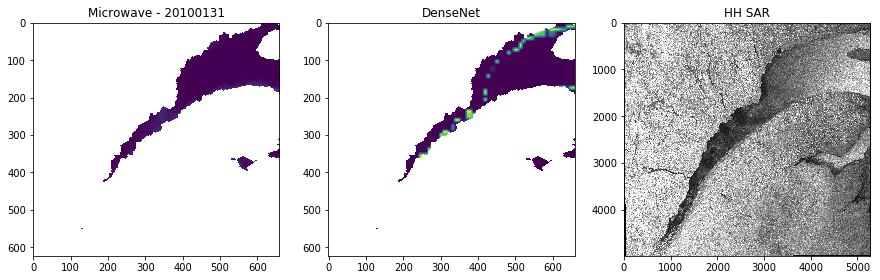

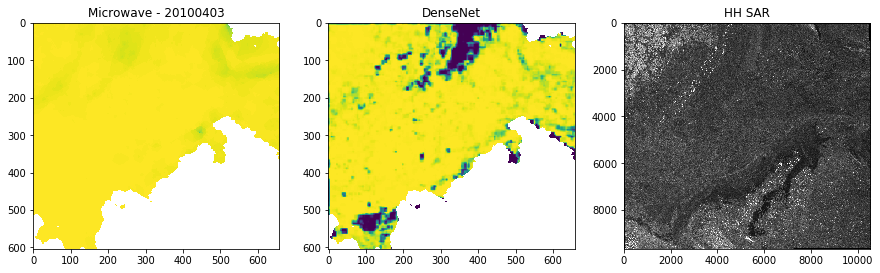

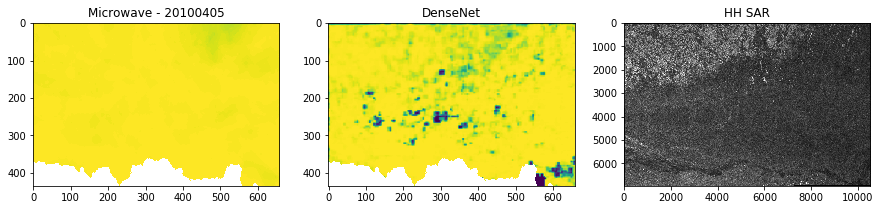

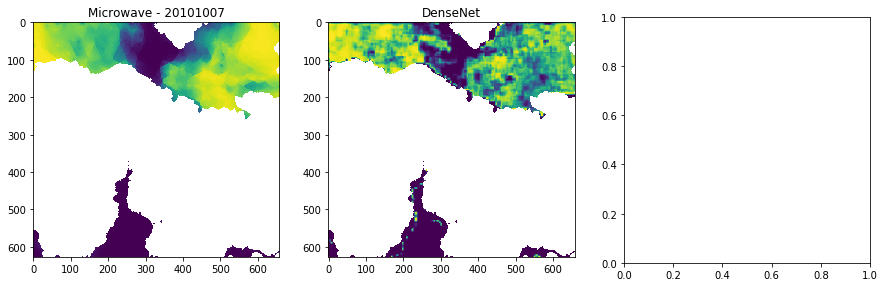

In [45]:
out_name = 'notebooks/training_microwave_compare'
os.makedirs(out_name, exist_ok=True)
for k,result in enumerate(glob.glob('net_checkpoint_FINAL_TRAIN/big*.tiff')):
    
    norm = colors.Normalize(0, 100)
    res_image = cv.imread(result, 0)
    folder_name = os.path.basename(result)[7:-5]
    print(folder_name)
    conc_image = cv.imread(os.path.join('training_data', folder_name, 'conc.tiff'), 0).astype(np.float32)
    hh_image = cv.imread(os.path.join('training_data', folder_name, 'imagery_HH.tif'))
#     hh_image = cv.resize(hh_image, conc_image.shape[0:2][::-1])
    res_image_big = cv.resize(res_image, conc_image.shape[0:2][::-1]).astype(np.float32)/2
    res_image_big[conc_image>100] = np.nan
    conc_image[conc_image>100] = np.nan
    f, axarr = plt.subplots(1, 3, figsize=(15, 8))
    im1 = axarr[0].imshow(conc_image, norm=norm)
    axarr[0].set_title('Microwave - ' +folder_name)
    im2 = axarr[1].imshow(res_image_big, norm=norm)
    axarr[1].set_title('DenseNet')
    im3 = axarr[2].imshow(hh_image, norm=norm)
    axarr[2].set_title('HH SAR')
#     break
    f.savefig(out_name + '/' + folder_name + '.png', bbox_inches='tight', pad_inches=0)
#     break

In [23]:
target_dirs = ['net_checkpoint_FINAL_LARGE_TRAIN_BIGGER/', 'net_checkpoint_FINAL_LARGE_LAB_BIGGER/', 'net_checkpoint_FINAL_LARGE_GSL_BIGGER/']

In [5]:
target_dirs = ['net_checkpoint_FINAL_LARGE_TRAIN_BIGGER/', 'net_checkpoint_FINAL_LARGE_GSL_BIGGER/', 'net_checkpoint_FINAL_LARGE_LAB_BIGGER/']

In [24]:
target_dirs = ['normal_checkpoint_LARGE_TRAIN', 'normal_checkpoint_LARGE_GSL', 'normal_checkpoint_LARGE_LAB']

In [8]:
target_dirs = ['net_checkpoint_FINAL_LARGE_LAB_MASKED_BIGGER//']

In [35]:
target_dirs = ['net_checkpoint_FINAL_TRAIN/', 'net_checkpoint_FINAL_MASKED_GSL/', 'net_checkpoint_FINAL_MASKED_LAB/']
target_dirs = target_dirs + ['net_checkpoint_FINAL_LARGE_TRAIN_BIGGER/', 'net_checkpoint_FINAL_LARGE_GSL_MASKED_BIGGER/', 'net_checkpoint_FINAL_LARGE_LAB_MASKED_BIGGER/']

In [91]:
target_dirs = ['net_checkpoint_FINAL_LARGE_TRAIN//']


In [10]:
glob.glob(target_dir + '/*.*')

['net_checkpoint_FINAL_LARGE_TRAIN\\bigger_20110705.tiff',
 'net_checkpoint_FINAL_LARGE_TRAIN\\new_mask_20110705.tiff']

In [94]:
def postprocessing(res, mask):
#     return g
    # DIY MED FILTER
    res_shape = res.shape
    filtered = np.zeros(res_shape)
    k_s = 5
    for i in range(res_shape[0]):
        for j in range(res_shape[1]):
            left = max(i - k_s//2, 0)
            right = min(i+ k_s//2, res_shape[0]-1)
            bottom = max(j - k_s//2, 0)
            top = min(j + k_s//2, res_shape[1] - 1)
            chunk_res = res[left:right, bottom:top]
            chunk_mask = mask[left:right, bottom:top]        
            filtered[i,j]  = 0 if np.min(chunk_mask) == 255 else np.median(chunk_res[chunk_mask != 255])
    filtered[mask==255] = 0
    return filtered

In [88]:
os.path.join(outer, os.path.basename(result))

'results_median-filter-5_net_checkpoint_FINAL_LARGE_TRAIN_BIGGER//bigger_20110903D.tiff'

In [90]:
cv.imwrite(os.path.join(outer, os.path.basename(result)), res_image)


True

figure_median-filter-5_net_checkpoint_FINAL_LARGE_TRAIN//
net_checkpoint_FINAL_LARGE_TRAIN\bigger_20100131.tiff
results_median-filter-5_net_checkpoint_FINAL_LARGE_TRAIN//bigger_20100131.tiff
net_checkpoint_FINAL_LARGE_TRAIN\bigger_20100403.tiff
results_median-filter-5_net_checkpoint_FINAL_LARGE_TRAIN//bigger_20100403.tiff
net_checkpoint_FINAL_LARGE_TRAIN\bigger_20100405.tiff
results_median-filter-5_net_checkpoint_FINAL_LARGE_TRAIN//bigger_20100405.tiff
net_checkpoint_FINAL_LARGE_TRAIN\bigger_20101007.tiff
results_median-filter-5_net_checkpoint_FINAL_LARGE_TRAIN//bigger_20101007.tiff
net_checkpoint_FINAL_LARGE_TRAIN\bigger_20101009.tiff
results_median-filter-5_net_checkpoint_FINAL_LARGE_TRAIN//bigger_20101009.tiff
net_checkpoint_FINAL_LARGE_TRAIN\bigger_20101009B.tiff
results_median-filter-5_net_checkpoint_FINAL_LARGE_TRAIN//bigger_20101009B.tiff
net_checkpoint_FINAL_LARGE_TRAIN\bigger_20101013.tiff
results_median-filter-5_net_checkpoint_FINAL_LARGE_TRAIN//bigger_20101013.tiff
net_check

c:\users\clvco\anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


net_checkpoint_FINAL_LARGE_TRAIN\bigger_20110903.tiff
results_median-filter-5_net_checkpoint_FINAL_LARGE_TRAIN//bigger_20110903.tiff
net_checkpoint_FINAL_LARGE_TRAIN\bigger_20110903B.tiff
results_median-filter-5_net_checkpoint_FINAL_LARGE_TRAIN//bigger_20110903B.tiff
net_checkpoint_FINAL_LARGE_TRAIN\bigger_20110903C.tiff
results_median-filter-5_net_checkpoint_FINAL_LARGE_TRAIN//bigger_20110903C.tiff
net_checkpoint_FINAL_LARGE_TRAIN\bigger_20110903D.tiff
results_median-filter-5_net_checkpoint_FINAL_LARGE_TRAIN//bigger_20110903D.tiff


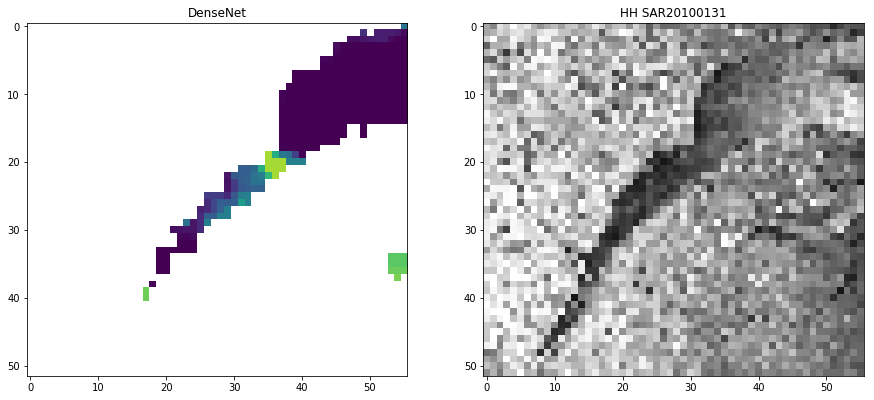

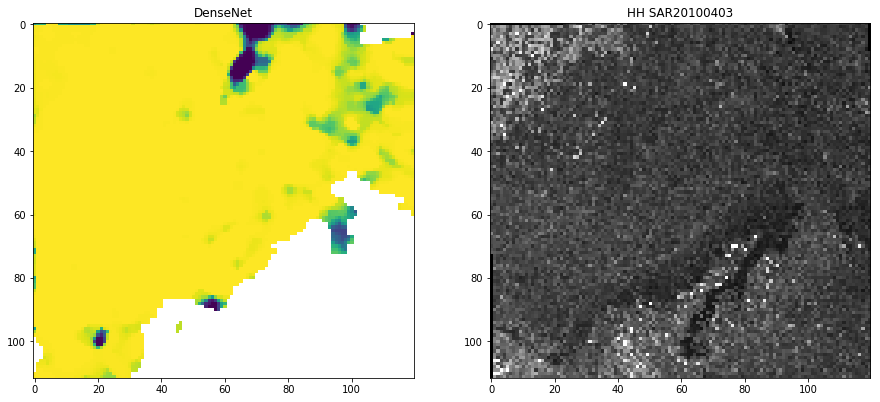

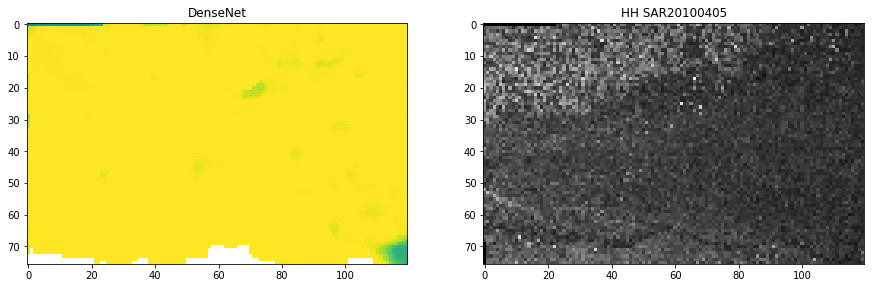

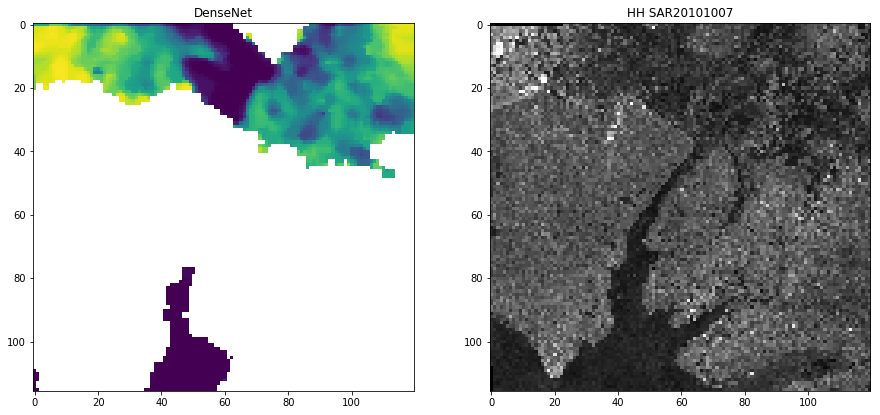

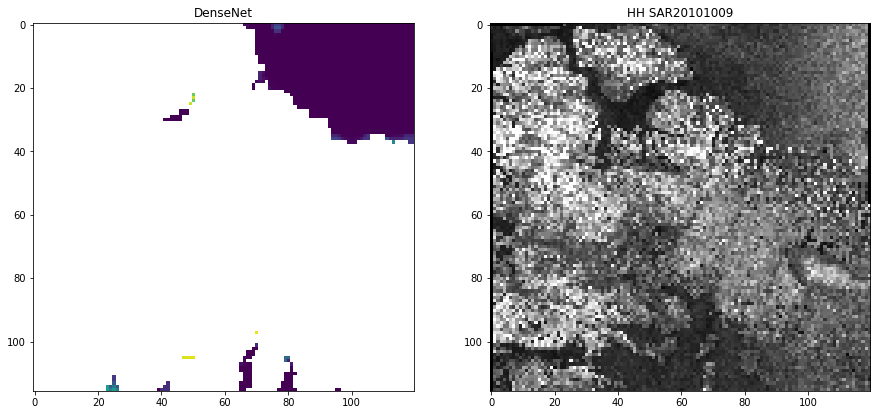

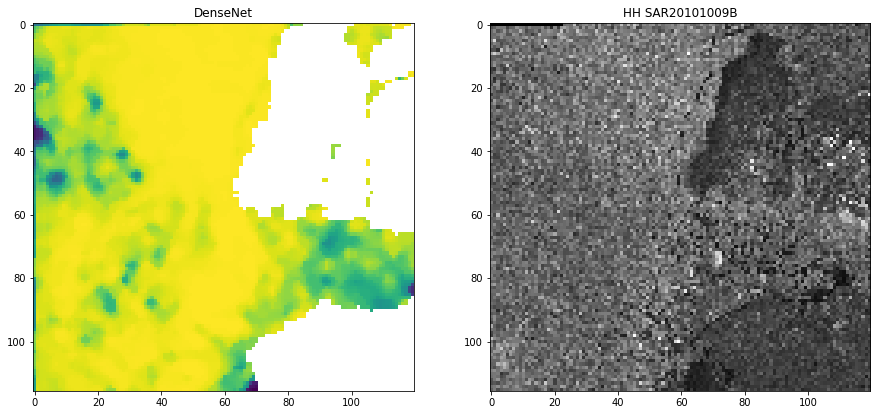

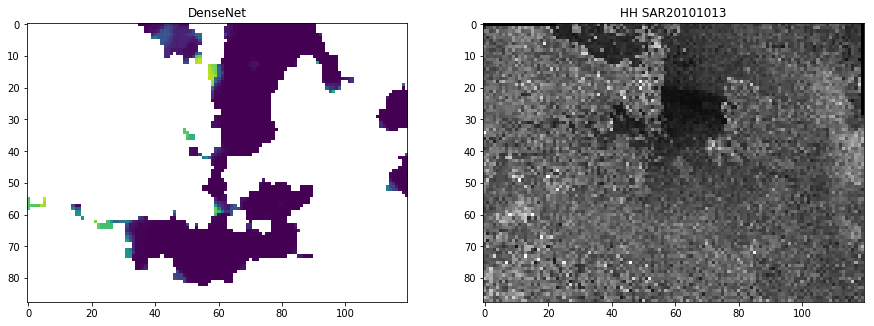

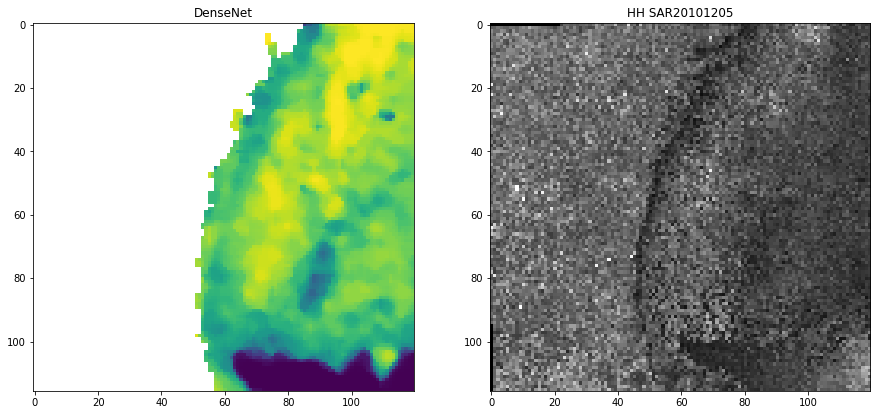

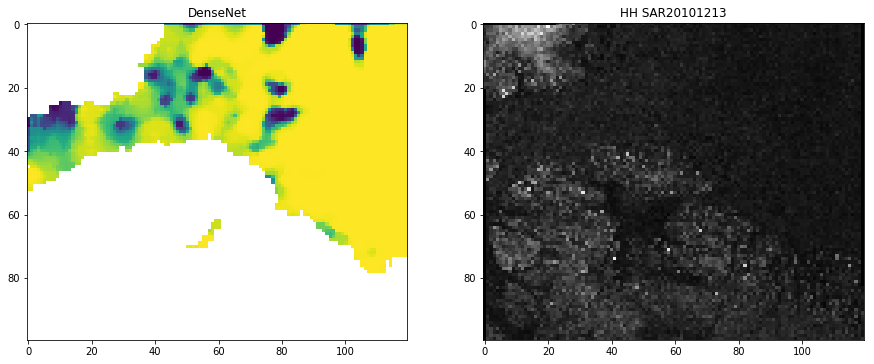

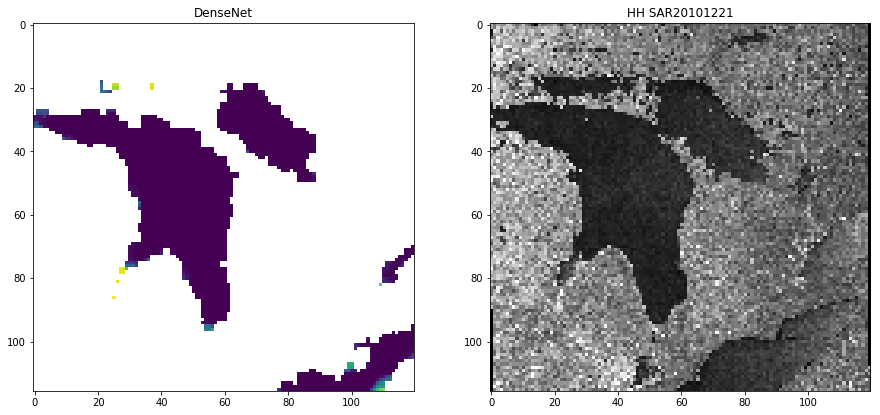

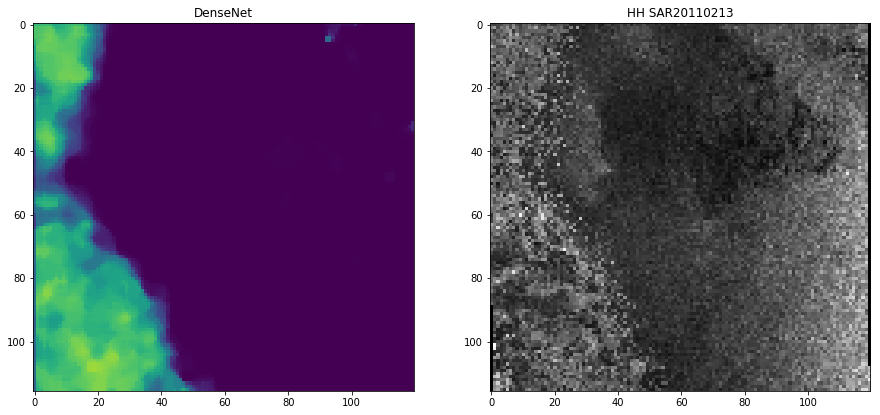

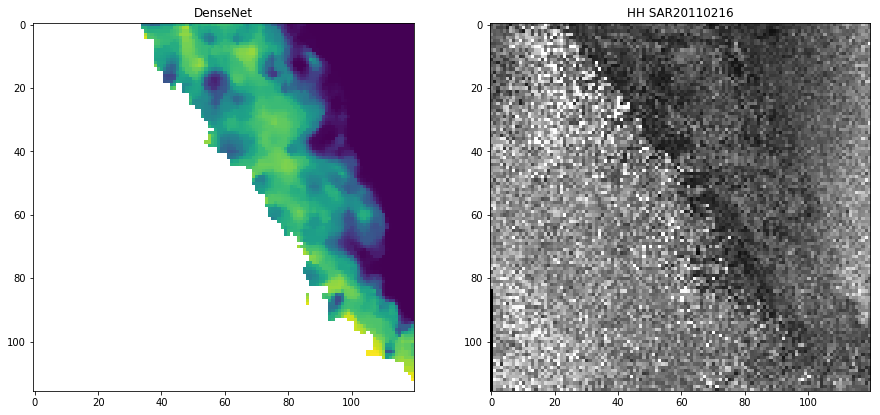

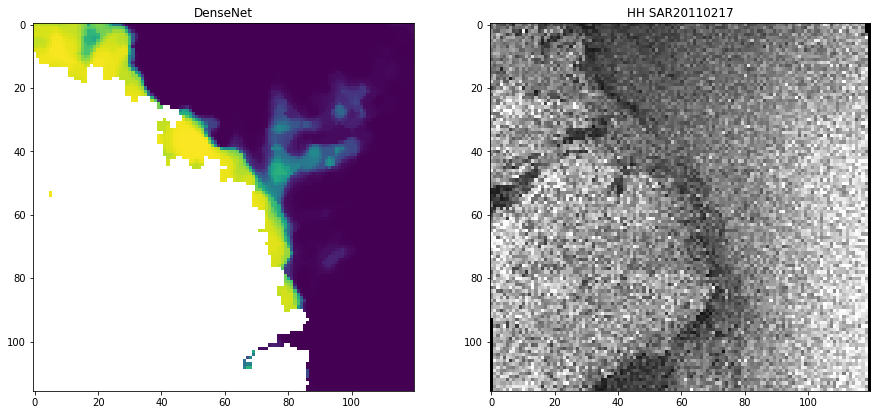

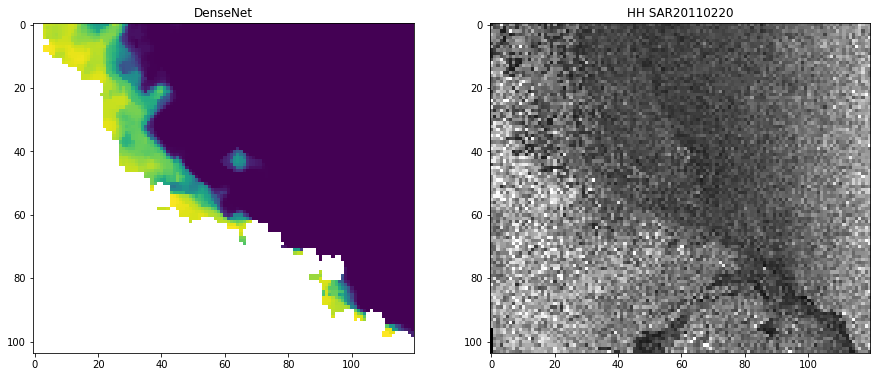

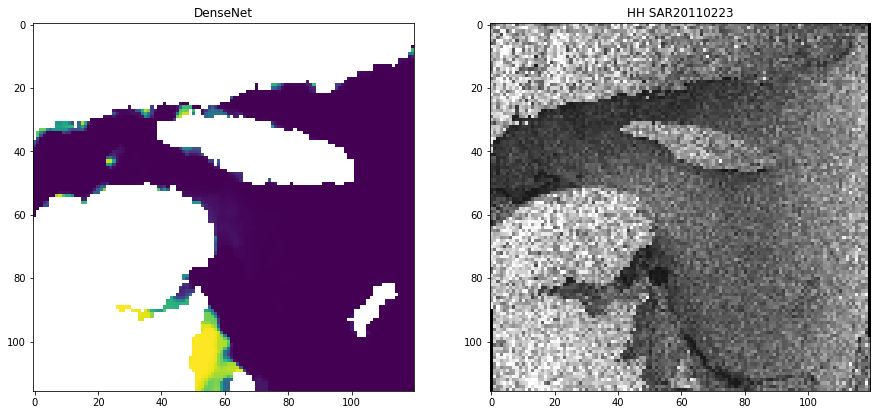

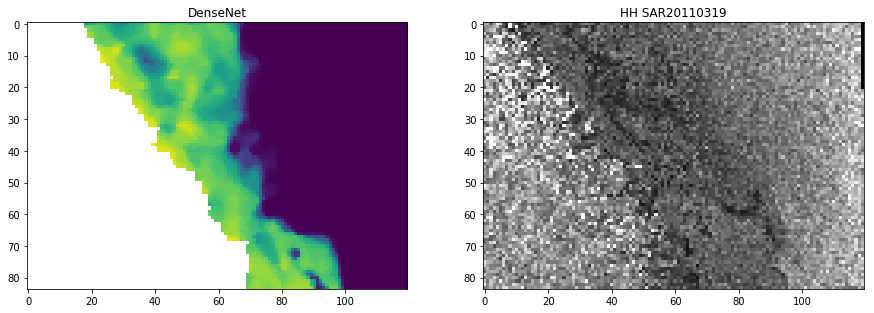

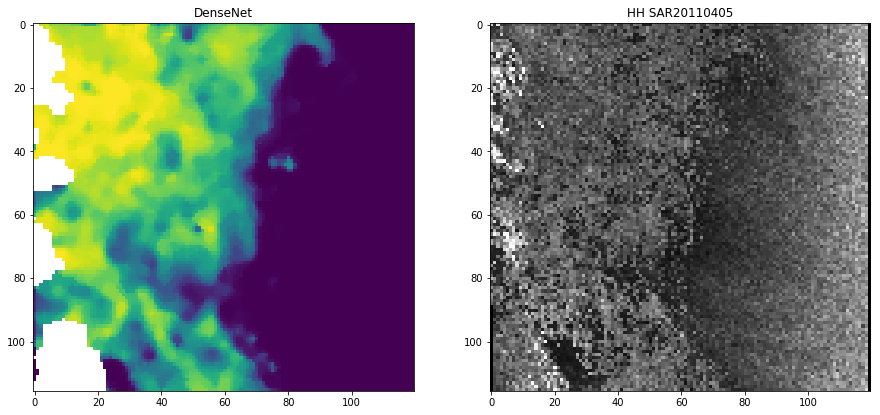

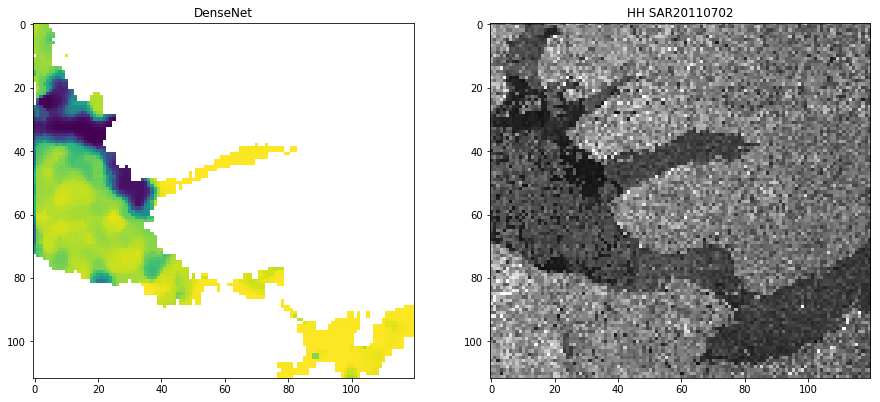

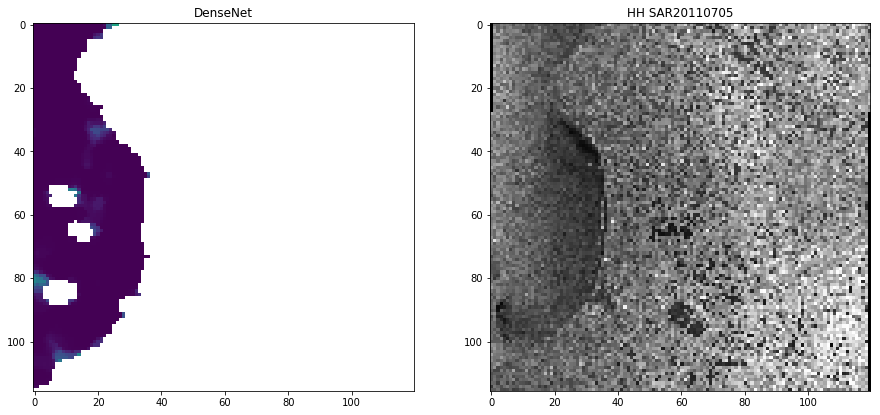

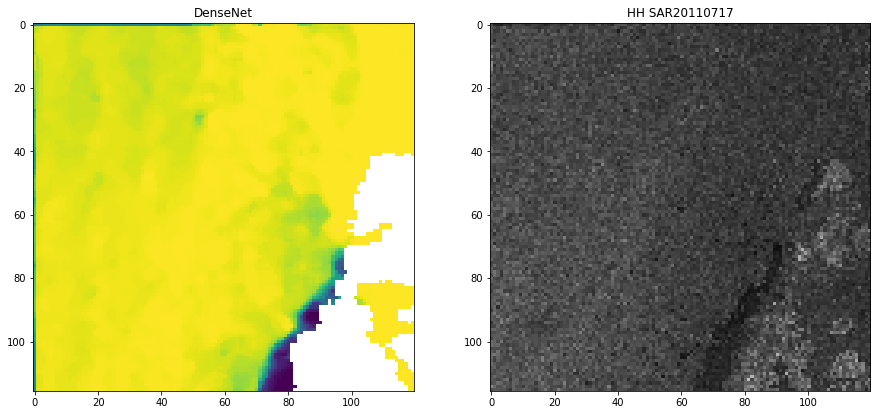

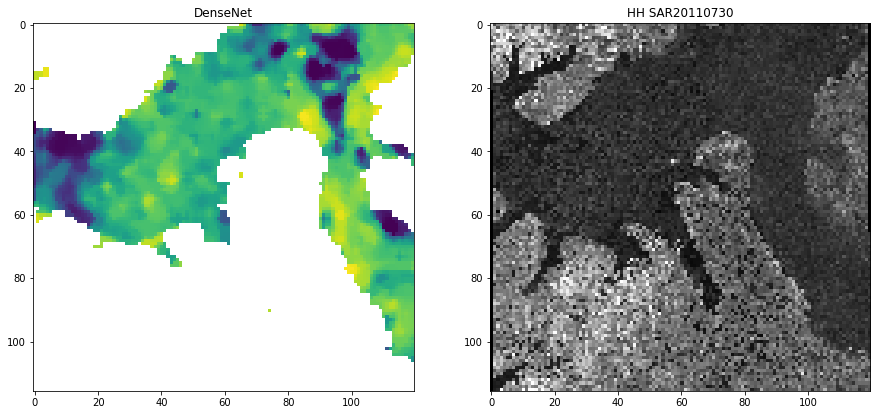

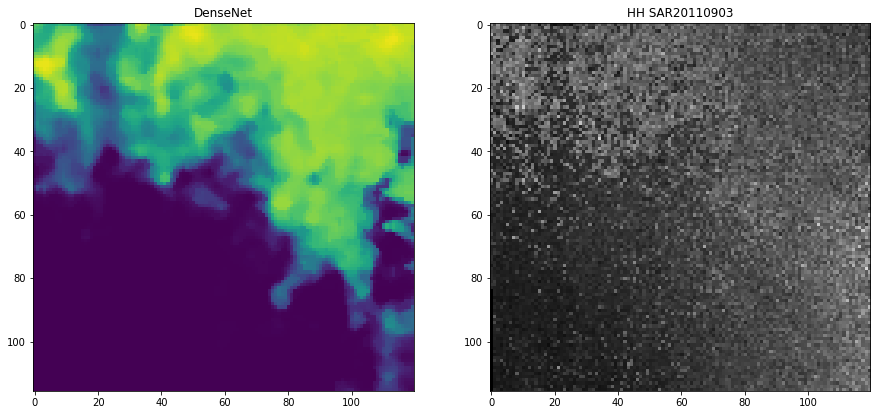

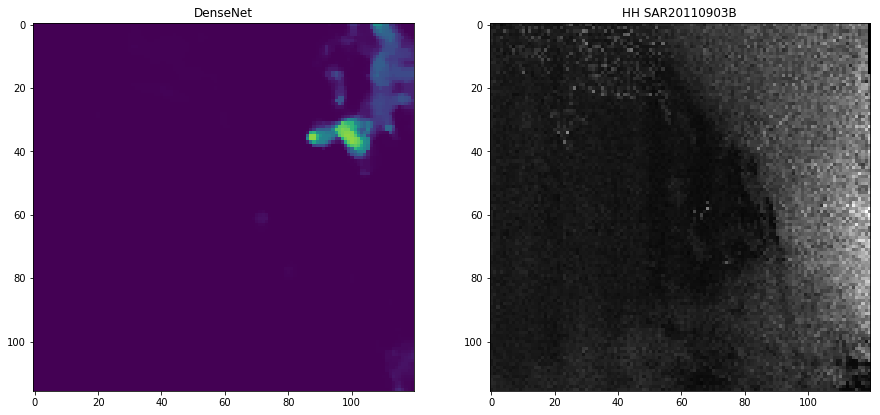

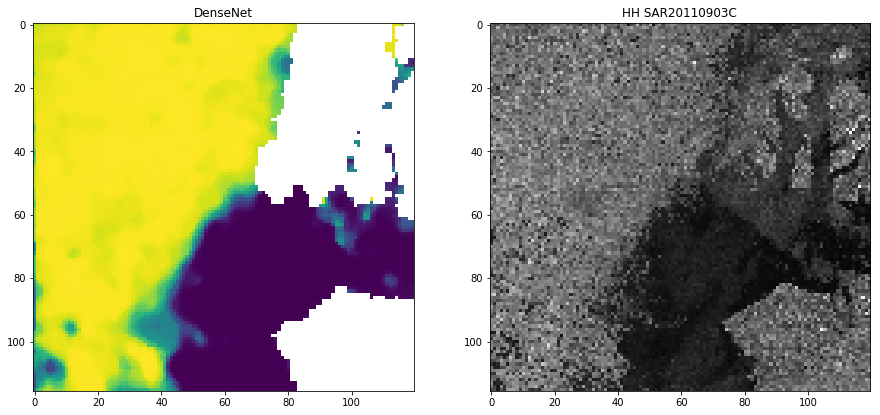

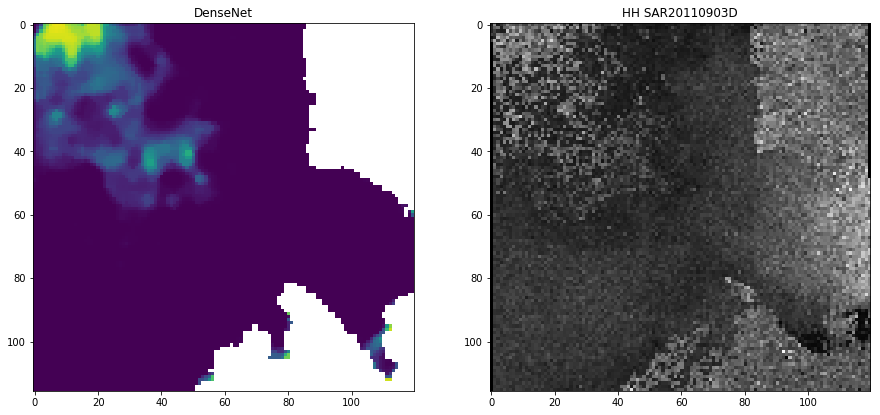

In [95]:
for target_dir in target_dirs:
    out_name = 'figure_median-filter-5_' + target_dir
    outer = 'results_median-filter-5_' + target_dir
    os.makedirs(out_name, exist_ok=True)
    os.makedirs(outer, exist_ok=True)
    print(out_name)
    for k,result in enumerate(glob.glob(os.path.join(target_dir ,'bigger_*.tiff'))):
        print(result)
        try:
            norm = colors.Normalize(0, 100)
            res_image = cv.imread(result, 0)
            folder_name = os.path.splitext(os.path.basename(result))[0][len('bigger_'):]
        #     folder_name = os.path.basename(result)[:-5]
#             print(folder_name)
            new_mask = cv.imread(os.path.join(target_dir, 'new_mask_' + folder_name + '.tiff'), 0).astype(np.float32)
         #         conc_image = new_mask
#             break
            res_image = preprocessing(res_image, new_mask)
            cv.imwrite(os.path.join(outer, os.path.basename(result)), res_image)
            print(os.path.join(outer, os.path.basename(result)))
            try:
                f = glob.glob('data_val/**/' + folder_name, recursive=True)[0]
            except IndexError:
                f = glob.glob('training_data/*' + folder_name + '*', recursive=True)[0]

        #         conc_image = cv.imread(os.path.join('training_data', folder_name, 'conc.tiff'), 0).astype(np.float32)
            conc_image = new_mask
            hh_image = cv.imread(os.path.join(f, 'imagery_HH.tif'))
        #     shutil.copy(os.path.join(f, 'imagery_HH.tif'), os.path.join(f,'clipped.tif'))
        #     gdal.Rasterize(os.path.join(f, 'clipped.tif'), os.path.join('data_val', 'land', 'gadm28.shp'), options=gdal.RasterizeOptions(burnValues=255))
        #     break
            hh_image = cv.resize(hh_image, conc_image.shape[0:2][::-1])
            res_image_big = cv.resize(res_image, conc_image.shape[0:2][::-1]).astype(np.float32)
            mask_big = cv.resize(new_mask, conc_image.shape[0:2][::-1]).astype(np.float32)
            res_image_big[mask_big>100] = np.nan
        #         conc_image[conc_image>100] = np.nan
            f, axarr = plt.subplots(1, 2, figsize=(15, 8))
        #     im1 = axarr[0].imshow(conc_image, norm=norm)
        #     axarr[0].set_title('Microwave - ' +folder_name)
            im2 = axarr[0].imshow(res_image_big, vmax=200, vmin=0)
            axarr[0].set_title('DenseNet')

            im3 = axarr[1].imshow(hh_image, vmax=200, vmin=0)
            axarr[1].set_title('HH SAR' + folder_name)
        #     break
        #     break
#             f.savefig(out_name + '/' + folder_name + '.png', bbox_inches='tight', pad_inches=0)
        #     break
        except AssertionError:
            pass


In [14]:
dates = ['20090322',
'20100125',
'20100131',
'20100403',
'20100405',
'20101005',
'20101007',
'20101009',
'20101013',
'20101014',
'20101205',
'20101213',
'20101221',
'20110213',
'20110214',
'20110216',
'20110217',
'20110220',
'20110223',
'20110319',
'20110405',
'20110627',
'20110702',
'20110705',
'20110717',
'20110730',
'20110731',
'20110903',
'20090322B',
'20100125B',
'20100131B',
'20101009B',
'20110627B',
'20110717B',
'20110717C',
'20110903B',
'20110903C',
'20110903D']

In [26]:
p = preprocessing(res_image, new_mask)
p = p.astype(np.float32)
p[new_mask==255] = np.nan


In [21]:
for date in dates:
    path = os.path.join('training_data/', date)
    uid = sorted(glob.glob(os.path.join(path, '*.tif')), key=os.path.getsize)[-1]
    print(os.path.basename(uid))

RS2_OK4491_PK59492_DK57897_SCWA_20090322_102729_HH.tif
RS2_OK9351_PK110810_DK107094_SCWA_20100125_101440_(1).tif
RS2_OK9357_PK106987_DK104035_SCWA_20100131_104308_(1).tif
RS2_OK10887_PK122340_DK118853_SCWA_20100403_153047.tif
RS2_OK10889_PK125552_DK119730_SCWA_20100405_161248.tif
RS2_OK15182_PK163886_DK154739_SCWA_20101005_234747(1).tif
RS2_OK15184_PK168846_DK154776_SCWA_20101007_143544.tif
RS2_OK15186_PK163997_DK154828_SCWA_20101009_115637.tif
RS2_OK15190_PK166582_DK157402_SCWA_20101013_132124(2).tif
RS2_OK15190_PK166583_DK157403_SCWA_20101014_005617(1).tif
RS2_OK16346_PK175175_DK165498_SCWA_20101205_123723.tif
RS2_OK16354_PK179351_DK169231_SCWA2_20101213_12002.tif
RS2_OK16362_PK178543_DK168426_SCWA_20101221_113456.tif
RS2_OK17838_PK191741_DK181195_SCWA_20110213_101452.tif
RS2_OK17839_PK188771_DK178634_SCWA_20110214_094659.tif
RS2_OK17841_PK188784_DK178647_SCWA_20110216_102816.tif
RS2_OK17842_PK188803_DK178660_SCWA_20110217_100003.tif
RS2_OK17845_PK188845_DK178702_SCWA_20110220_101204

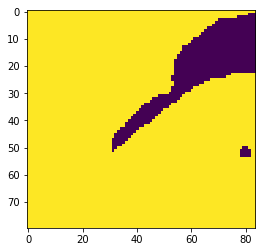

In [20]:
uid

'training_data/20110903D\\RS2_OK23032_PK242148_DK220928_SCWA_20110903_152221(2).tif'

In [17]:
os.listdir(path)

['ArcticZoom_asi-n3125-20110903.tif',
 'asi-n6250-20110903-v5.nc',
 'conc.tiff',
 'imagery_HH.tif',
 'imagery_HV.tif',
 'LongitudeLatitudeGrid-n3125-ArcticZoom.nc',
 'RS2_OK23032_PK242148_DK220928_SCWA_20110903_152221',
 'RS2_OK23032_PK242148_DK220928_SCWA_20110903_152221(1)',
 'RS2_OK23032_PK242148_DK220928_SCWA_20110903_152221(1).tif',
 'RS2_OK23032_PK242148_DK220928_SCWA_20110903_152221(2)',
 'RS2_OK23032_PK242148_DK220928_SCWA_20110903_152221(2).tif',
 'RS2_OK23032_PK242148_DK220928_SCWA_20110903_152221(3)',
 'RS2_OK23032_PK242148_DK220928_SCWA_20110903_152221.tif']

In [17]:
target_dir

'net_checkpoint_FINAL_LARGE_TRAIN_SUPER/'

20100131
20100405
20101007
20101213
20101221
20110216
20110220
20110223
20110319
20110702
20110705
20110903C


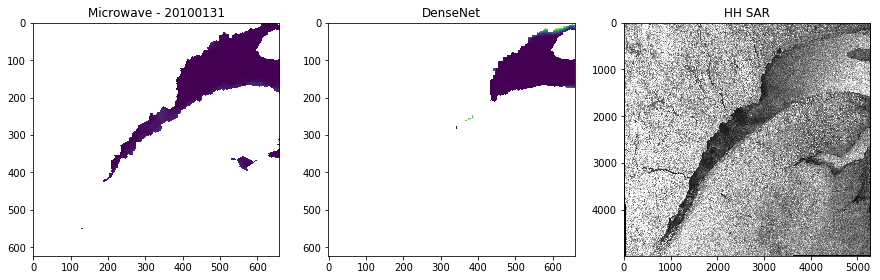

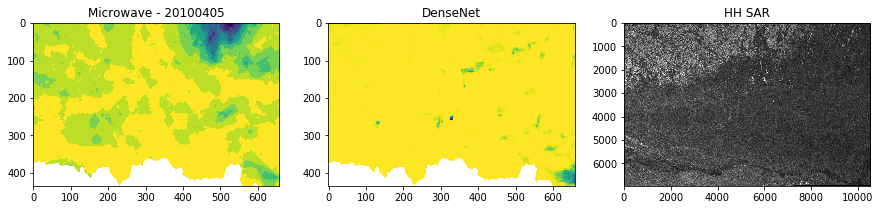

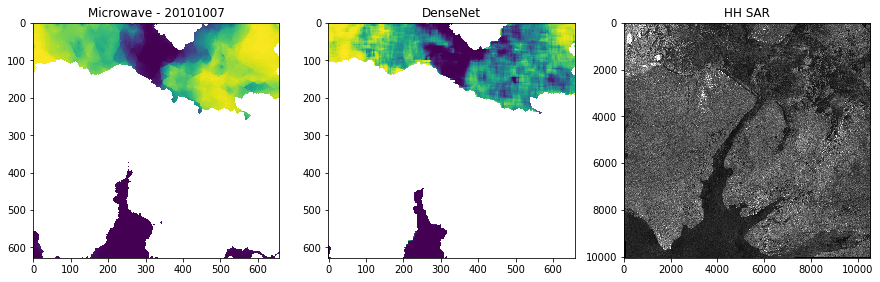

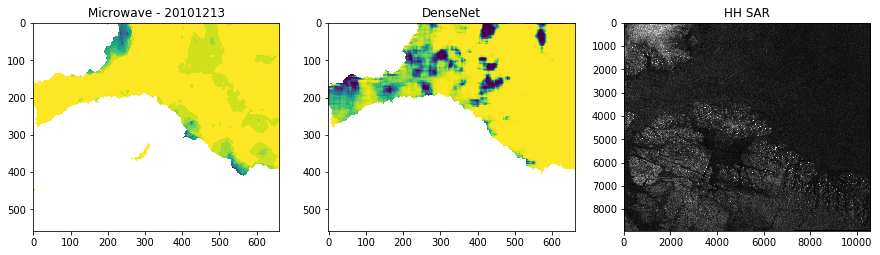

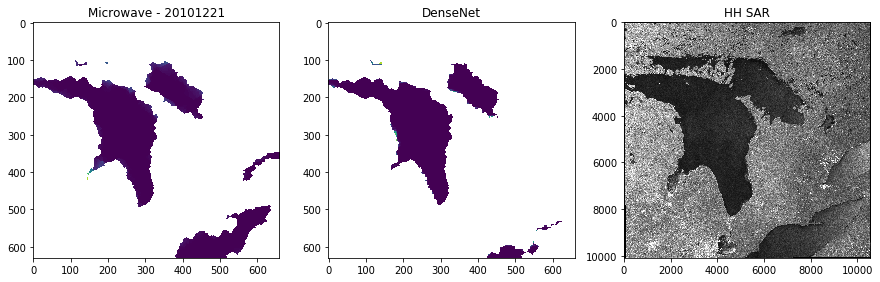

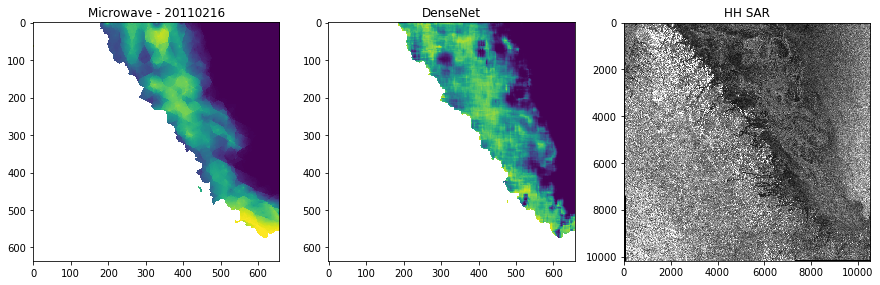

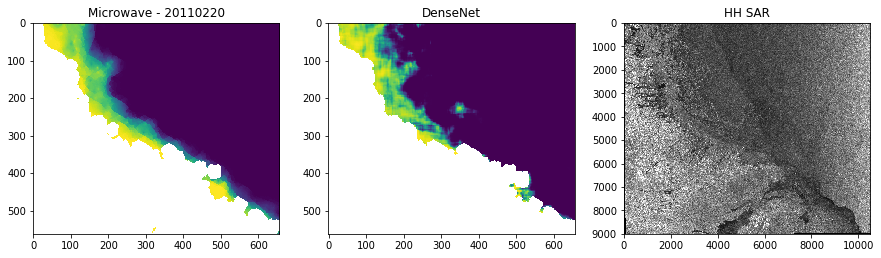

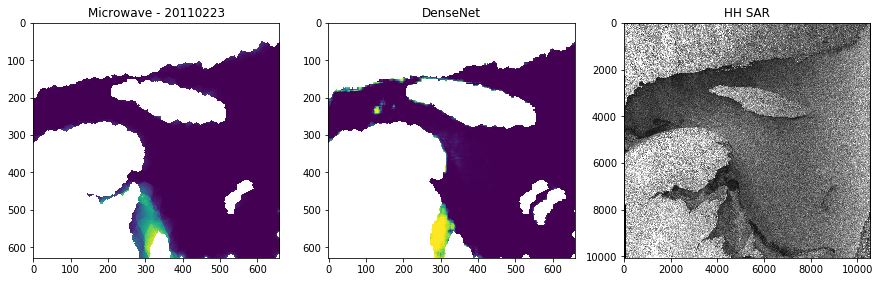

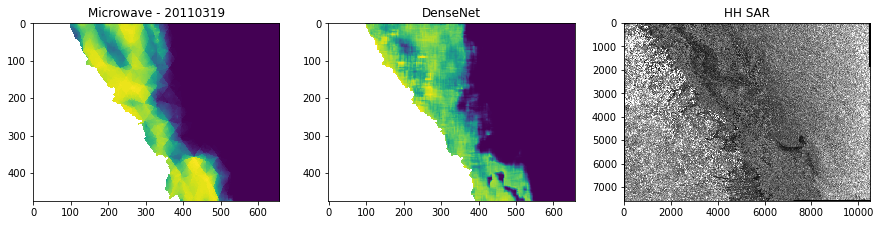

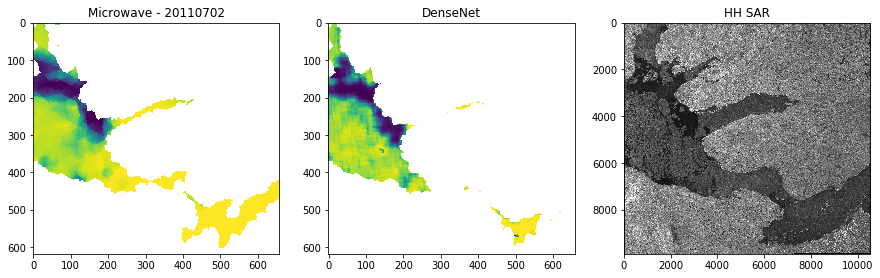

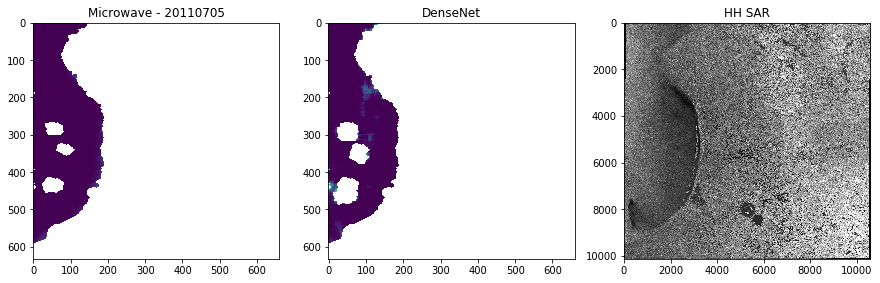

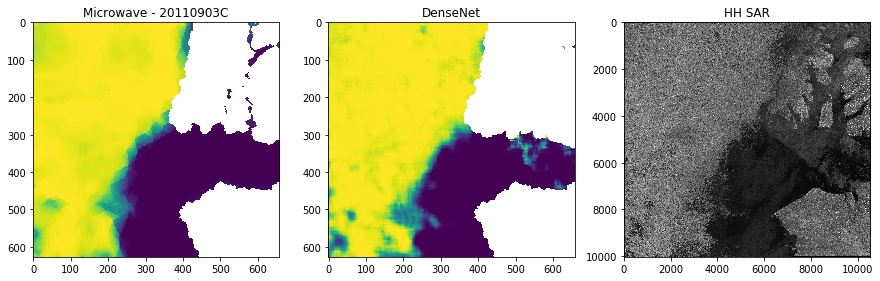

In [19]:

for k,result in enumerate(glob.glob(target_dir + '/bigger_*.tiff')):
    norm = colors.Normalize(0, 100)
    res_image = cv.imread(result, 0)
#     res_image = preprocessing(res_image)
    folder_name = os.path.splitext(os.path.basename(result))[0][len('bigger_'):]
#     folder_name = os.path.basename(result)[:-5]
    print(folder_name)
    f = glob.glob('training_data/*' + folder_name + '*', recursive=True)[0]
#     f = glob.glob('data_val/**/' + folder_name, recursive=True)[0]
    conc_image = cv.imread(os.path.join('training_data', folder_name, 'conc.tiff'), 0).astype(np.float32)
    mask = cv.imread(result.replace('bigger_', 'new_mask_'), 0)
    hh_image = cv.imread(os.path.join(f, 'imagery_HH.tif'))
#     shutil.copy(os.path.join(f, 'imagery_HH.tif'), os.path.join(f,'clipped.tif'))
#     gdal.Rasterize(os.path.join(f, 'clipped.tif'), os.path.join('data_val', 'land', 'gadm28.shp'), options=gdal.RasterizeOptions(burnValues=255))
#     break
#     hh_image = cv.resize(hh_image, conc_image.shape[0:2][::-1])
#     res_image_big = cv.resize(res_image, conc_image.shape[0:2][::-1]).astype(np.float32)
    res_image_big = res_image.astype(np.float32)
    res_image_big[mask>100] = np.nan
    res_image_big = cv.resize(res_image_big, conc_image.shape[0:2][::-1]).astype(np.float32)
    res_image_big[conc_image>100]=np.nan
    conc_image[conc_image>100] = np.nan
    f, axarr = plt.subplots(1, 3, figsize=(15, 8))
    im1 = axarr[0].imshow(conc_image, vmax=100)
    axarr[0].set_title('Microwave - ' +folder_name)
    im2 = axarr[1].imshow(res_image_big, vmax=200)
    axarr[1].set_title('DenseNet')

    im3 = axarr[2].imshow(hh_image, vmax=200)
    axarr[2].set_title('HH SAR')
#     break
#     break
#     break
#     f.savefig(out_name + '/' + folder_name + '.png', bbox_inches='tight', pad_inches=0)
#     break


In [10]:
ma = cv.imread(mask)

TypeError: Image data cannot be converted to float

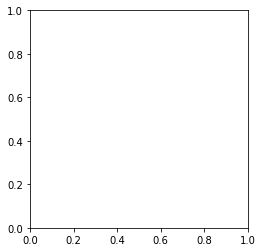

In [12]:
plt.imshow(ma)

In [12]:
folder_name

'20100131'

In [24]:
gdal.RasterizeOptions(burnValues=255)

(<osgeo.gdal.GDALRasterizeOptions; proxy of <Swig Object of type 'GDALRasterizeOptions *' at 0x00000251F7D400C0> >,
 None,
 None)

In [49]:
res_image.shape

(129, 135)

In [50]:
hh_image.shape

(9975, 10570, 3)

In [52]:
(9975/129)*50

3866.279069767442

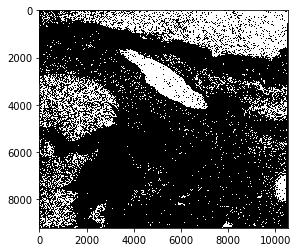

In [30]:
plt.imshow(cv.threshold(hh_image, 120, 255, cv.THRESH_BINARY)[1])

In [ ]:
f.s

In [4]:
for j, k in enumerate(['lll','ddd']):
    print(k)

lll
ddd


In [32]:
f.savefig()

dtype('uint8')

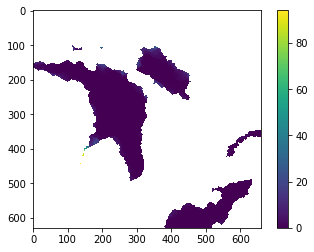

In [37]:
plt.imshow(conc_image)
plt.colorbar()

In [34]:
conc_image[conc_image==0] = np.nan

In [31]:
import os
import glob
import shutil

In [28]:
output_folder = r"C:\Users\clvco\Google Drive\3B\URA\final_results\concentration_images"
training_folder = r"C:\Users\clvco\URA_W18\training_data"

In [29]:
conc_paths = glob.glob(os.path.join(training_folder, '*/conc.tiff'))

In [33]:
for conc_path in conc_paths:
    output_name = os.path.basename(os.path.dirname(conc_path))  + ".tiff"
    output_path = os.path.join(output_folder, output_name)
    shutil.copy(conc_path, output_path)